In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as mc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
# Generate demo data

np.random.seed(123)
size = 100

alpha, sigma = 1, 1
beta = [1, 2.5]

X1 = np.linspace(0, 1, size)
X2 = np.linspace(0, .2, size)

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

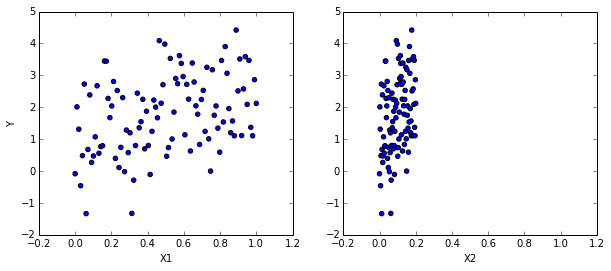

In [21]:
fig, axes = subplots(1, 2, sharex=True, figsize=(10,4))

axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[0].scatter(X1, Y)

axes[1].set_xlabel('X2')
axes[1].scatter(X2, Y)

In [22]:
basic_model = mc.Model()

with basic_model:
    alpha = mc.Normal('alpha', mu=0, sd=10)
    beta = mc.Normal('beta', mu=0, sd=10, shape=2)
    sigma = mc.HalfNormal('sigma', sd=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    Y_obs = mc.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [28]:
with basic_model:
    start = mc.find_MAP()
    
    step = mc.NUTS(scaling=start)
    
    trace = mc.sample(2000, step, start=start)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.5 sec

/usr/local/lib/python2.7/site-packages/theano/gof/cmodule.py:324: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  rval = __import__(module_name, {}, {}, [module_name])


array([[<matplotlib.axes.AxesSubplot object at 0x10ca18510>,
        <matplotlib.axes.AxesSubplot object at 0x10cd6b9d0>]], dtype=object)

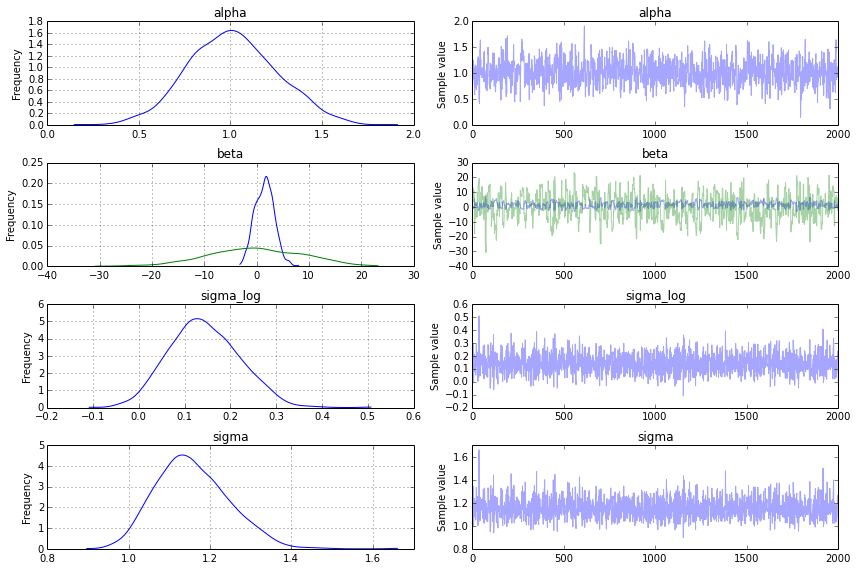

In [29]:
mc.traceplot(trace)

In [30]:
mc.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.016            0.242            0.007            [0.511, 1.456]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.547          0.844          1.008          1.175          1.498


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.542            1.810            0.093            [-2.007, 4.838]
  -0.080           8.865            0.452            [-16.514, 16.564]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.932         0.214          1.609          2.805          5.064
  -17.121        -6.206         -0.1